Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:

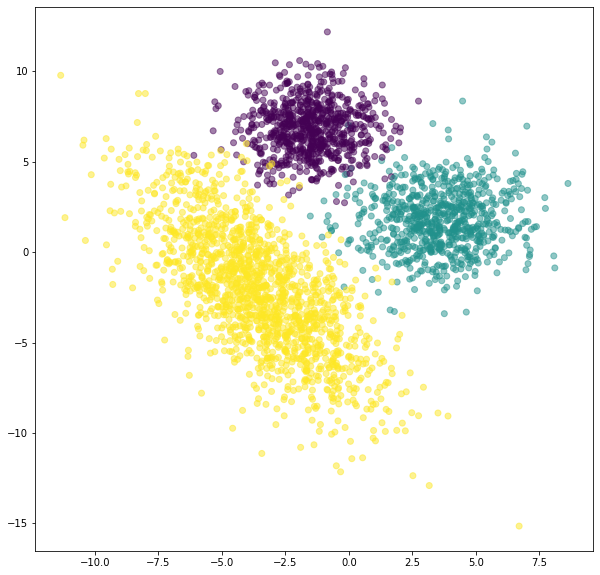

In [32]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [33]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:

In [34]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, init='random')

Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

In [35]:
k_means.fit(X)

KMeans(init='random', n_clusters=3)

Обучив, мы можем получить центроиды кластеров:

In [36]:
k_means.cluster_centers_

array([[-3.20141322, -2.88329489],
       [ 3.63560063,  1.74586847],
       [-2.36049089,  6.256396  ]])

И узнать, в какой кластер попал каждый из объектов:

In [37]:
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [ 4  2]
 [-2  6]]


<ipython-input-37-eecebf80d3f7>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.round(k_means.cluster_centers_).astype(np.int))


In [38]:
labels = k_means.labels_

In [39]:
_, counts = np.unique(labels, return_counts=True)

In [40]:
for count in counts:
    print(count, ' ')

1324  
742  
934  


Для визуализации получившегося датасета можно использовать следующий код:

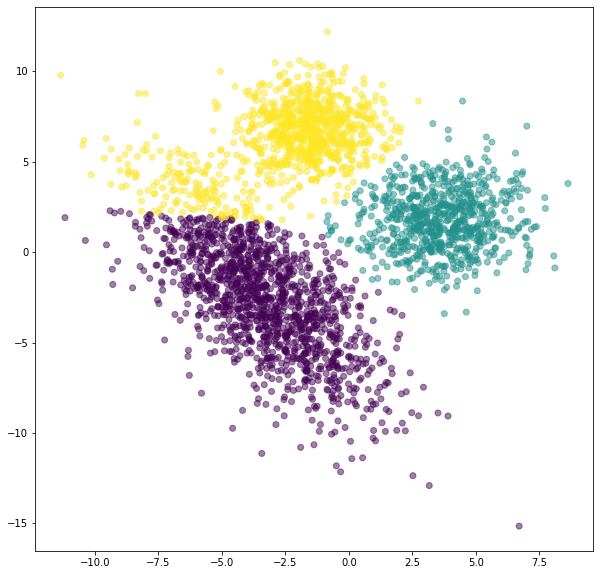

In [41]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [125]:
data = pd.read_csv('data/snsdata.csv')

In [127]:
df = data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [96]:
scaler = StandardScaler().fit(df)
X = scaler.transform(df)

In [129]:
kmean = KMeans(n_clusters=9, random_state=123)
kmean.fit(X)

In [131]:
df = pd.DataFrame(X, columns= df.columns)
df['cluster_label'] = kmean.labels_

In [139]:
claster, counts = np.unique(kmean.labels_, return_counts=True)
list(zip(claster, counts))

[(0, 5036),
 (1, 1337),
 (2, 752),
 (3, 697),
 (4, 20024),
 (5, 1),
 (6, 846),
 (7, 466),
 (8, 841)]

In [138]:
for k, group in df.groupby('cluster_label'):
    print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    print(top_words)

0
shopping      0.741588
cute          0.630049
mall          0.567930
basketball    0.565760
dance         0.538354
football      0.518118
dress         0.470623
clothes       0.433646
baseball      0.429919
hot           0.429536
dtype: float64
1
drunk     3.312068
hair      0.188037
drugs     0.167117
sex       0.152475
die       0.147142
sexy      0.134827
death     0.110054
cute      0.076737
kissed    0.076393
hot       0.052662
dtype: float64
2
marching    4.800943
band        3.401470
music       0.381358
rock        0.140320
dress       0.037142
swimming    0.035834
dance       0.033486
football    0.032560
god         0.029794
church      0.021332
dtype: float64
3
soccer        5.100506
sports        0.339417
football      0.205740
shopping      0.201942
basketball    0.200881
swimming      0.109129
rock          0.104357
tennis        0.089168
church        0.087781
volleyball    0.072273
dtype: float64
4
blonde     -0.029210
tennis     -0.043063
jesus      -0.075895
death  